#**Wine type prediction**

- The main goal is to predict the type of wine based on several features from a dataset.
- This will be achieved with the help of deep learning and several pythin libraries.


#**Importing the required libraries.**

In [16]:
# Import Required Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# For white wine
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep =';')

# For red wine
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep =';')


In [17]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
# Take a sample of five rows of `red`
red.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
331,10.2,0.36,0.64,2.9,0.122,10.0,41.0,0.99800,3.23,0.66,12.5,6
890,7.2,0.34,0.24,2.0,0.071,30.0,52.0,0.99576,3.44,0.58,10.1,5
1469,7.3,0.98,0.05,2.1,0.061,20.0,49.0,0.99705,3.31,0.55,9.7,3
1087,7.9,0.19,0.42,1.6,0.057,18.0,30.0,0.99400,3.29,0.69,11.2,6
215,7.0,0.49,0.49,5.6,0.060,26.0,121.0,0.99740,3.34,0.76,10.5,5


#**Histogram to help visualize the data.**

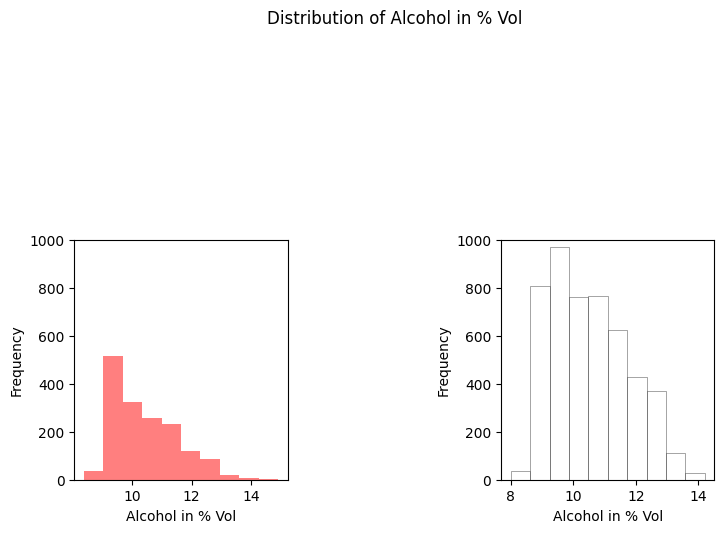

In [19]:
# Create Histogram
fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor ='red',
			alpha = 0.5, label ="Red wine")

ax[1].hist(white.alcohol, 10, facecolor ='white',
		ec ="black", lw = 0.5, alpha = 0.5,
		label ="White wine")

fig.subplots_adjust(left = 0, right = 1, bottom = 0,
			top = 0.5, hspace = 0.05, wspace = 1)

ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_ylim([0, 1000])
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")

fig.suptitle("Distribution of Alcohol in % Vol")
plt.show()

In [22]:
# Add `type` column to `red` with price one
red['type'] = 1

# Add `type` column to `white` with price zero
white['type'] = 0

# Append `white` to `red` using concat
wines = pd.concat([red, white], ignore_index=True)

# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split
X = wines.iloc[:, 0:11]
y = np.ravel(wines.type)

# Splitting the data set for training and validating
X_train, X_test, y_train, y_test = train_test_split(
		X, y, test_size = 0.34, random_state = 45)

#**Configuring the neural network**

- sequential: linear stack of layers.
- dense: densely, fully-connected neural network layer.
- input layer: add a dense layer with 12 neurons using ReLU (Rectified Linear Unit) activation function.
- input_shape = (11,): specifies the input layer expects input data with 11 features.
- hidden layer: added this dense layer with 9 neurons & also using the ReLU activation function (layer takes in input from the previous layer).
- output layer: a dense layer with 1 neuron since we're dealing with a classification problem


# **For information about the model**
- model.output_shape = returns output's shape & it indicates for any batch size, the output will be a single value (once it's run)
- model.summary() = returns a summary of the model's architecture

# **About the compilation of the model**
- .compile: prepares a model for training
- loss = binary_crossentropy: selecting which loss function to use
- metrics=['accuracy'] : specify the accuracy metric to be used for evaluation of model performance.

In [23]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Constructor/model initialization
# Creating an instance of the Sequential model allowing for one to stack layers on top of each other
model = Sequential()

# Add an input layer
model.add(Dense(12, activation ='relu', input_shape =(11, )))

# Add one hidden layer
model.add(Dense(9, activation ='relu'))

# Add an output layer
model.add(Dense(1, activation ='sigmoid'))

# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors
model.get_weights()
model.compile(loss ='binary_crossentropy',
optimizer ='adam', metrics =['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                144       
                                                                 
 dense_1 (Dense)             (None, 9)                 117       
                                                                 
 dense_2 (Dense)             (None, 1)                 10        
                                                                 
Total params: 271 (1.06 KB)
Trainable params: 271 (1.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# Training Model
model.fit(X_train, y_train, epochs = 3,
		batch_size = 1, verbose = 1)

# Predicting the Value
y_pred = model.predict(X_test)
print(y_pred)

Epoch 1/3
4288/4288 [==============================] - 9s 2ms/step - loss: 0.4858 - accuracy: 0.9076
Epoch 2/3
4288/4288 [==============================] - 9s 2ms/step - loss: 0.2227 - accuracy: 0.9345
Epoch 3/3
70/70 [==============================] - 0s 2ms/step
[[0.0447001]
 [0.0447001]
 [0.0447001]
 ...
 [0.0447001]
 [0.0447001]
 [0.0447001]]
